In [3]:
import warnings
warnings.filterwarnings('ignore')

import os 


In [4]:
dir_Path = "/home/abdel/Documents/DOTNET_Project/Data backup/DataRepo/TEST"
os.chdir(dir_Path)

In [5]:
import pandas as pd 

Reviewdata = pd.read_csv('merged.csv')

In [6]:
Reviewdata.shape

(30693, 5)

In [7]:
Reviewdata.head()

,Review_date,Stars,ShortReview,Review,hotelName
0,August 2015,5,fab,best ever place to go in the region. i recomme...,NaN
1,January 2015,4,Winter holiday,We stayed at this hotel for 17 days in January...,NaN
2,January 2023,5,Lovely winter sun holiday at a great hotel,We have just returned from Founty beach. We ha...,hotelName
3,August 2022,5,Great hotel and amazing staff,This is my third holiday in Agadir and I have ...,Iberostar_Founty_Beach
4,December 2022,5,In love with this Hotel!,Just back from a week stay for the New Year at...,Iberostar_Founty_Beach


In [8]:
Reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30693 entries, 0 to 30692
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_date  30693 non-null  object
 1   Stars        30693 non-null  int64 
 2   ShortReview  30692 non-null  object
 3   Review       30693 non-null  object
 4   hotelName    29406 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


In [9]:
Reviewdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Stars,30693.0,4.427589,0.977765,1.0,4.0,5.0,5.0,5.0


# DATA CLEANING 

In [10]:
count = Reviewdata.isnull().sum().sort_values(ascending=False)
percentage = ((Reviewdata.isnull()).sum()/len(Reviewdata)*100).sort_values(ascending=False)

missing_data = pd.concat([count, percentage], axis=1, keys =['count','percentage'])
print('count and percentage of missing values for columns')

missing_data

count and percentage of missing values for columns


,count,percentage
hotelName,1287,4.193139
ShortReview,1,0.003258
Review_date,0,0.000000
Stars,0,0.000000
Review,0,0.000000


In [11]:
Reviewdata.drop(columns=['Review_date','hotelName'], inplace=True)

Percentage for default

5    65.88
4    20.26
3     7.76
1     3.17
2     2.92
Name: Stars, dtype: float64


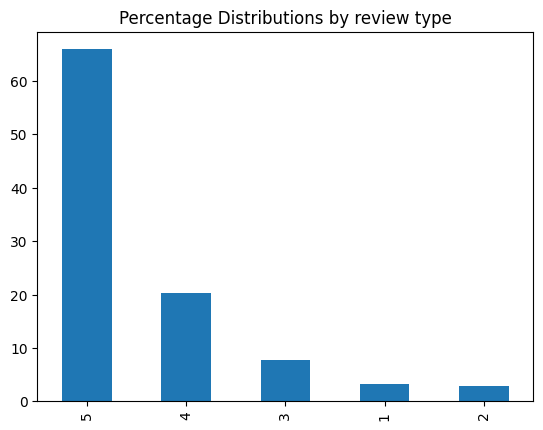

In [12]:
##DATA CLEANING 
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(Reviewdata.Stars.value_counts(normalize=True)*100,2))
round(Reviewdata.Stars.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()


In [13]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [14]:
# Let's take a look at the updated text
Reviewdata['cleaned_Reviews'] = pd.DataFrame(Reviewdata.Review.apply(cleaned1))
Reviewdata.head(10)

,Stars,ShortReview,Review,cleaned_Reviews
0,5,fab,best ever place to go in the region. i recomme...,best ever place to go in the region i recommen...
1,4,Winter holiday,We stayed at this hotel for 17 days in January...,we stayed at this hotel for days in january o...
2,5,Lovely winter sun holiday at a great hotel,We have just returned from Founty beach. We ha...,we have just returned from founty beach we had...
3,5,Great hotel and amazing staff,This is my third holiday in Agadir and I have ...,this is my third holiday in agadir and i have ...
4,5,In love with this Hotel!,Just back from a week stay for the New Year at...,just back from a week stay for the new year at...
5,5,Great hotel great staff,We are just coming to the end of our week holi...,we are just coming to the end of our week holi...
6,5,Best staff,Went to stay in this hotel for a week for a re...,went to stay in this hotel for a week for a re...
7,5,Holiday,We had a wonderful time at this hotel. Food wa...,we had a wonderful time at this hotel food was...
8,5,"Friendly Staff, Lots to do!",I enjoyed my stay here last year in June. The ...,i enjoyed my stay here last year in june the f...
9,5,Holiday,Had the most amazing holiday at Iberostar Foun...,had the most amazing holiday at iberostar foun...


In [15]:
Reviewdata['cleaned_ShortReview'] = pd.DataFrame(Reviewdata.ShortReview.apply(cleaned2))
Reviewdata.head(10)

NameError: name 'cleaned2' is not defined

In [20]:
Reviewdata.head()

,Stars,ShortReview,Review,cleaned_Reviews
0,5,fab,best ever place to go in the region. i recomme...,best ever place to go in the region i recommen...
1,4,Winter holiday,We stayed at this hotel for 17 days in January...,we stayed at this hotel for days in january o...
2,5,Lovely winter sun holiday at a great hotel,We have just returned from Founty beach. We ha...,we have just returned from founty beach we had...
3,5,Great hotel and amazing staff,This is my third holiday in Agadir and I have ...,this is my third holiday in agadir and i have ...
4,5,In love with this Hotel!,Just back from a week stay for the New Year at...,just back from a week stay for the new year at...


In [21]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [22]:
# Let's take a look at the updated text
Reviewdata['Cleaned_R'] = pd.DataFrame(Reviewdata['cleaned_Reviews'].apply(cleaned2))
Reviewdata.head(10)

,Stars,ShortReview,Review,cleaned_Reviews,Cleaned_R
0,5,fab,best ever place to go in the region. i recomme...,best ever place to go in the region i recommen...,best ever place to go in the region i recommen...
1,4,Winter holiday,We stayed at this hotel for 17 days in January...,we stayed at this hotel for days in january o...,we stayed at this hotel for days in january o...
2,5,Lovely winter sun holiday at a great hotel,We have just returned from Founty beach. We ha...,we have just returned from founty beach we had...,we have just returned from founty beach we had...
3,5,Great hotel and amazing staff,This is my third holiday in Agadir and I have ...,this is my third holiday in agadir and i have ...,this is my third holiday in agadir and i have ...
4,5,In love with this Hotel!,Just back from a week stay for the New Year at...,just back from a week stay for the new year at...,just back from a week stay for the new year at...
5,5,Great hotel great staff,We are just coming to the end of our week holi...,we are just coming to the end of our week holi...,we are just coming to the end of our week holi...
6,5,Best staff,Went to stay in this hotel for a week for a re...,went to stay in this hotel for a week for a re...,went to stay in this hotel for a week for a re...
7,5,Holiday,We had a wonderful time at this hotel. Food wa...,we had a wonderful time at this hotel food was...,we had a wonderful time at this hotel food was...
8,5,"Friendly Staff, Lots to do!",I enjoyed my stay here last year in June. The ...,i enjoyed my stay here last year in june the f...,i enjoyed my stay here last year in june the f...
9,5,Holiday,Had the most amazing holiday at Iberostar Foun...,had the most amazing holiday at iberostar foun...,had the most amazing holiday at iberostar foun...


In [23]:
from sklearn.model_selection import train_test_split

Independent_var = Reviewdata.Cleaned_R
Dependent_var = Reviewdata.Stars

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))

IV_train : 27623
IV_test  : 3070
DV_train : 27623
DV_test  : 3070


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [25]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[  35,   12,    4,    2,    2],
       [   6,    9,    3,    3,    0],
       [  26,   43,   91,   23,   10],
       [   9,   18,  113,  241,  115],
       [  19,   16,   49,  342, 1879]])

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.7345276872964169
Precision :  0.7962384211692058
Recall :  0.7345276872964169


In [34]:
exemple = ["In love "]
result = model.predict(exemple)
print(result)

[5]
